# Plots the pmfs of binomial distributions with varying probability of success parameter

In [2]:
try:
    import jax
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

try:
    from scipy.stats import binom
except:
    %pip install scipy
    from scipy.stats import binom

In [3]:
import os

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    import sys

    sys.path.append("scripts")
    from plot_utils import latexify, savefig

    latexify(width_scale_factor=2, fig_height=1.5)

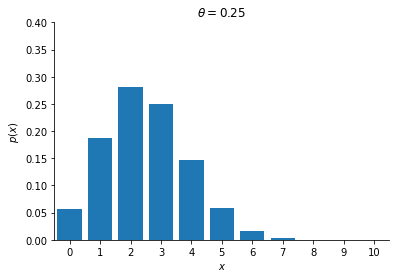

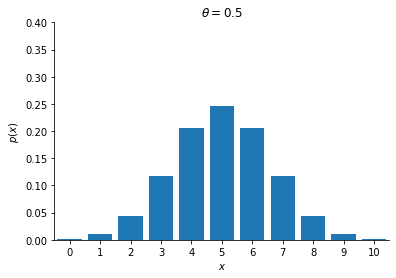

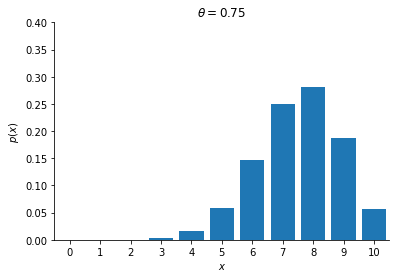

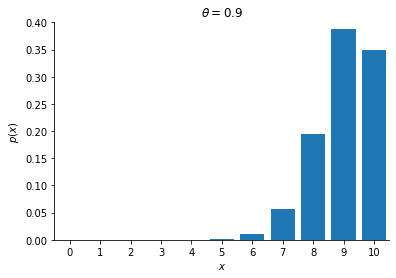

In [4]:
N = 10
thetas = [0.25, 0.5, 0.75, 0.9]
x = jnp.arange(0, N + 1)


def make_graph(data):
    plt.figure()
    x = data["x"]
    n = data["n"]
    theta = data["theta"]

    probs = binom.pmf(x, n, theta)
    title = r"$\theta=" + str(theta) + "$"

    plt.bar(x, probs, align="center")
    plt.xlim([min(x) - 0.5, max(x) + 0.5])
    plt.ylim([0, 0.4])
    plt.xticks(x)
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.title(title)
    sns.despine()
    if LATEXIFY:
        savefig("binomDistTheta" + str(int(theta * 100)) + "_latexified.pdf")


for theta in thetas:
    data = {"x": x, "n": N, "theta": theta}
    make_graph(data)

## Demo
You can see different examples of binomial distributions by changing the theta in the following demo.

In [5]:
from ipywidgets import interact


@interact(theta=(0.1, 0.9))
def generate_random(theta):
    n = 10
    data = {"x": jnp.arange(0, n + 1), "n": n, "theta": theta}
    make_graph(data)

interactive(children=(FloatSlider(value=0.5, description='theta', max=0.9, min=0.1), Output()), _dom_classes=(…